In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [2]:
churn = pd.read_csv('churn_raw.csv')

In [3]:
## Converting the class I am predicting to 1's and 0's

conditions = [
    churn.churn == True,
    churn.churn == False
]

choices = [
    1,
    0,
]

churn.churn = np.select(conditions, choices)

In [4]:
## Converting international plan to 1's and 0's

conditions = [
    churn['international plan'] == 'no',
    churn['international plan'] == 'yes'
]

choices = [
    0,
    1,
]

churn['international plan'] = np.select(conditions, choices)

In [6]:
## Converting voice mail plan to 1's and 0's

conditions = [
    churn['voice mail plan'] == 'no',
    churn['voice mail plan'] == 'yes'
]

choices = [
    0,
    1,
]

churn['voice mail plan'] = np.select(conditions, choices)

In [9]:
## Dropping phone number because each observation has a unique number
## Not interesting information

churn.drop('phone number', axis = 1, inplace = True)

In [13]:
churn[churn['international plan'] == 1]['churn'].mean()

0.4241486068111455

In [14]:
churn[churn['international plan'] == 0]['churn'].mean()

0.11495016611295682

## This difference in churn rate between customers that have an internation plan and customers that do not appears to be significant. I will use hypothesis testing to verify.

## Does having an international plan affect a customer's likelihood to churn?

## Ho: P₁ = P₂
## Ha: P₁ ≠ P₂

In [15]:
churn[churn['international plan'] == 1]['churn'].sum()

137

In [16]:
churn[churn['international plan'] == 1]['churn'].count()

323

In [17]:
churn[churn['international plan'] == 0]['churn'].sum()

346

In [18]:
churn[churn['international plan'] == 0]['churn'].count()

3010

In [19]:
count = np.array([137, 346])

In [20]:
nobs =np.array([323,3010])

In [21]:
## Two proportions z-test

stat, pval = proportions_ztest(count, nobs)

In [22]:
## Calculating Z-stat
stat

15.001803255009364

In [23]:
## Calculating p-value

pval

7.145140406313257e-51

## With a test statistic of 15.00 and a p-value of 7.15x10^-51, I can reject the null hypothesis that the proportions are equal for people that have an international plan and those who do not. As a result, I will keep this feature.

In [24]:
intl1 = churn[churn['international plan'] == 1]['churn']
intl2 = churn[churn['international plan'] == 0]['churn']

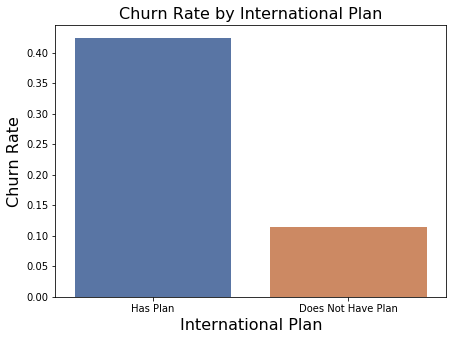

In [25]:
## Plotting to show the difference in churn rate by international plan

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x = ['Has Plan', 'Does Not Have Plan'],y= [intl1.mean(), intl2.mean()], order = ['Has Plan', 'Does Not Have Plan'],palette ='deep', ax=ax)
ax.set_xlabel("International Plan", fontsize=16)
ax.set_ylabel("Churn Rate", fontsize=16)
ax.set_title('Churn Rate by International Plan', fontsize=16)
fig.savefig("Churn Rate by International Plan.png")
ax;

# Feature Engineering

## I wanted to see if I could use the state column in a way that would be useful for my model

In [26]:
## Dividing the states by median household income

state_list = churn.state.unique()

In [27]:
state_list = state_list.tolist()

In [28]:
type(state_list)

list

In [29]:
top_states = ['DC', 'MD', 'NJ', 'HI', 'MA', 'CT', 'CA', 'NH', 'AK', 'WA', 'VA', 'CO', 'UT', 'MN', 'NY', 'IL', 'DE', 'RI', 'ND', 'OR', 'WY', 'PA', 'VT', 'WI', 'TX']


In [30]:
len(top_states)

25

In [31]:
churn['top income states'] = np.where(churn.state.isin(top_states), 1, 0)

In [32]:
churn[churn['top income states'] == 1]['churn'].mean()

0.1472915398660986

In [33]:
churn[churn['top income states'] == 0]['churn'].mean()

0.142603550295858

## I don't need to run a proportion test to see that there is not a statistically significant difference there

In [34]:
## Now trying to divide the states by cost of living

low_col_states = ['MS', 'AR', 'OK', 'MO', 'NM', 'TN', 'MI', 'KS', 'GA', 'WY', 'AL', 'IN', 'IA', 'OH', 'NE', 'KY', 'WV', 'TX', 'ID', 'LA', 'IL', 'NC', 'SC', 'AZ', 'WI']

In [35]:
len(low_col_states)

25

In [36]:
churn['low col'] = np.where(churn.state.isin(low_col_states), 1, 0)

In [37]:
churn['low col']

0       1
1       1
2       0
3       1
4       1
       ..
3328    1
3329    1
3330    0
3331    0
3332    1
Name: low col, Length: 3333, dtype: int64

## Does living in a low cost of living state affect a customer's likelihood to churn?

## Ho: P₁ = P₂
## Ha: P₁ ≠ P₂

In [38]:
churn[churn['low col'] == 1]['churn'].mean()

0.13466183574879226

In [39]:
churn[churn['low col'] == 0]['churn'].mean()

0.15503875968992248

In [40]:
churn[churn['low col'] == 0]['churn'].sum()

260

In [41]:
churn[churn['low col'] == 0]['churn'].count()

1677

In [42]:
churn[churn['low col'] == 1]['churn'].sum()

223

In [43]:
churn[churn['low col'] == 1]['churn'].count()

1656

In [44]:
## Two proportion z-test

count = np.array([260, 223])

nobs =np.array([1677,1656])

stat, pval = proportions_ztest(count, nobs)

In [45]:
## Calculating z-stat and p-value

print(stat)
print(pval)

1.6709251019653661
0.09473647264953622


## With a test statistic of 1.67 and a P-Value .09, I was unable to reject the null hypothesis that there is not a statistically signifcant difference in churn rate for customers that live in low cost of living states vs customers that live in high cost of living states.

In [46]:
## Tried multiplying low cost of living states by top income states to create a top quality of life feature

churn['top qol'] = churn['low col'] * churn['top income states']

## Does living in a top quality of life state affect a customer's likelihood to churn?

## Ho: P₁ = P₂
## Ha: P₁ ≠ P₂

In [47]:
churn[churn['top qol'] == 0]['churn'].mean()

0.14566929133858267

In [48]:
churn[churn['top qol'] == 1]['churn'].mean()

0.1368421052631579

In [49]:
churn[churn['top qol'] == 1]['churn'].sum()

39

In [50]:
churn[churn['top qol'] == 1]['churn'].count()

285

In [51]:
churn[churn['top qol'] == 0]['churn'].sum()

444

In [52]:
churn[churn['top qol'] == 0]['churn'].count()

3048

In [53]:
count = np.array([39, 444])
nobs = np.array([285, 3048])

In [54]:
## Two proportion z-test

stat, pval = proportions_ztest(count, nobs)

In [55]:
## Calculating p-valie

pval

0.6856016764928314

In [56]:
## Calculating z-test

stat

-0.40483108673001705

In [57]:
churn['top qol'].value_counts()

0    3048
1     285
Name: top qol, dtype: int64

## With a test statistic of -.40 and a P-Value .689, I was unable to reject the null hypothesis that there is not a statistically signifcant difference in churn rate for customers that live in a top quality of life states vs customers that do not.

In [58]:
qol1 = churn[churn['top qol'] == 1]['churn']
qol2 = churn[churn['top qol'] == 0]['churn']

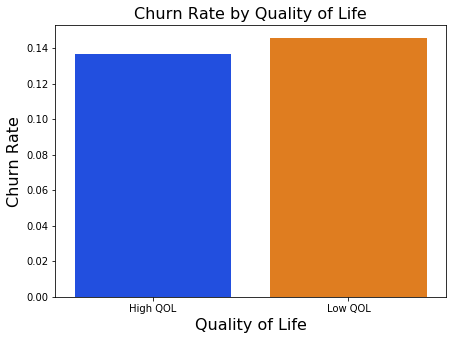

In [59]:
## Plotting to show the difference in churn rate using quality of life

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x = ['High QOL','Low QOL'],y=[qol1.mean(), qol2.mean()],order = ['High QOL', 'Low QOL'], palette ='bright', ax=ax)
ax.set_xlabel("Quality of Life", fontsize=16)
ax.set_ylabel("Churn Rate", fontsize=16)
ax.set_title('Churn Rate by Quality of Life', fontsize=16)
fig.savefig("Churn Rate by Quality of Life.png")
ax;

## As a result, I will be dropping all state related features from my dataset.

In [60]:
churn.drop(['state', 'top qol', 'low col', 'top income states'], axis = 1, inplace=True)

In [61]:
churn

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


## Is Area Code An Important Feature? Let's Run a One-Way ANOVA and Find Out.

## Ho: µ_first_ac = µ_second_ac = µ_third_ac 
## Ha: µ_first_ac ≠ µ_second_ac ≠ µ_third_ac 

In [62]:
first_ac = churn[churn['area code'] == 415]['churn']

In [63]:
second_ac = churn[churn['area code'] == 510]['churn']

In [64]:
third_ac = churn[churn['area code'] == 408]['churn']

In [65]:
stats.f_oneway(first_ac,second_ac,third_ac)


F_onewayResult(statistic=0.0886951688589008, pvalue=0.9151266513306314)

## With a threshold of .05, our F-statistic of .089 and a P-value of .915 means that I have failed to reject the null hypothesis that the difference in churn rate for each area code is not statistically significant. As a result, I have determined that area code is not an important feature and I will be dropping it from the dataset.

In [66]:
churn.drop('area code', axis = 1, inplace = True)

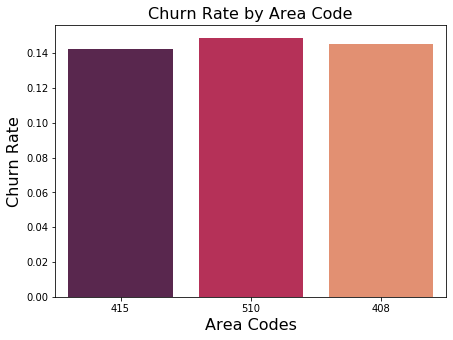

In [67]:

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x = ['415','510','408'],y=[first_ac.mean(), second_ac.mean(), third_ac.mean()],order = ['415', '510', '408'],palette ='rocket', ax=ax)
ax.set_xlabel("Area Codes", fontsize=16)
ax.set_ylabel("Churn Rate", fontsize=16)
ax.set_title('Churn Rate by Area Code', fontsize=16)
fig.savefig("Churn Rate by Area Code.png")
ax;

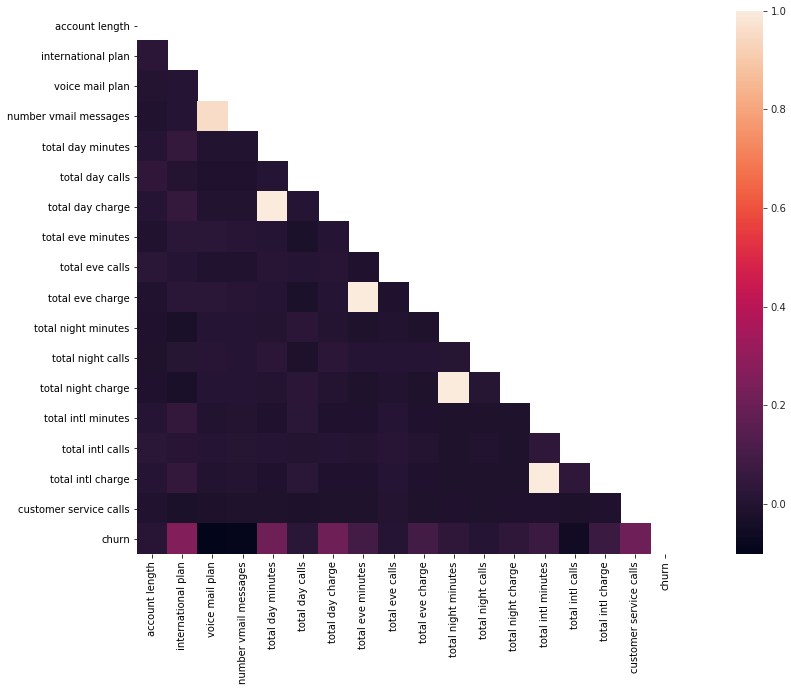

In [68]:
## Heatmap to check if any features are heavily correlated

fig, ax = plt.subplots(figsize=(20, 10))
mask = np.zeros_like(churn.corr()) #heat map of correlations
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(churn.corr(), mask=mask, square=True)

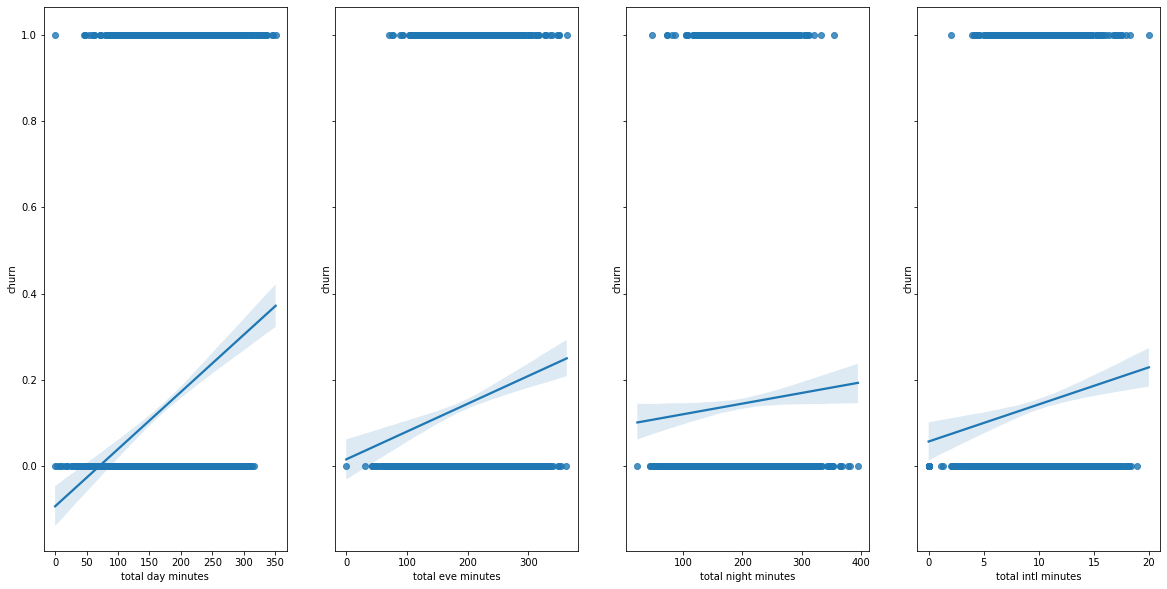

In [69]:
# Regression plot to see if these features, which are heavily correlated with other features, are useful to keep

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize = (20,10),ncols=4, sharey = True)
sns.regplot(x=churn['total day minutes'], y=churn.churn, ax=ax1)
sns.regplot(x=churn['total eve minutes'],  y=churn.churn, ax=ax2)
sns.regplot(x=churn['total night minutes'],  y=churn.churn, ax=ax3) 
sns.regplot(x=churn['total intl minutes'],  y=churn.churn, ax=ax4)
ax;

In [70]:
# Dropping these features

churn.drop(['total eve minutes', 'total day minutes', 'total night minutes', 'total intl minutes', 'voice mail plan'], axis = 1, inplace=True)

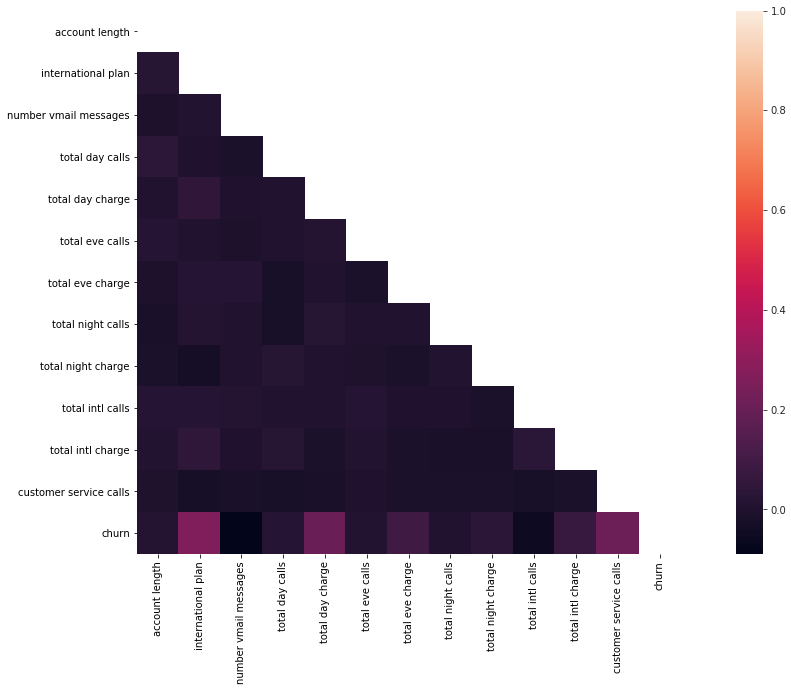

In [71]:
# Checking to see if there are any remaining strong correlations

fig, ax = plt.subplots(figsize=(20, 10))
mask = np.zeros_like(churn.corr()) #heat map of correlations
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(churn.corr(), mask=mask, square=True)

## There are not any strong correlations anymore, so these features are ready for modeling

In [72]:
churn

,account length,international plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,0,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0
1,107,0,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
2,137,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
3,84,1,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
4,75,1,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,36,77,26.55,126,18.32,83,12.56,6,2.67,2,0
3329,68,0,0,57,39.29,55,13.04,123,8.61,4,2.59,3,0
3330,28,0,0,109,30.74,58,24.55,91,8.64,6,3.81,2,0
3331,184,1,0,105,36.35,84,13.57,137,6.26,10,1.35,2,0


In [73]:
churn.to_csv('churn.csv')